# From the file with all scores, we want to look at the classified protons

In [1]:
import ROOT ,os, sys , math
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/GBDTprotons/GBDTprotonPackage/boost')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/GBDTprotons/GBDTprotonPackage/mac')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/GBDTprotons/GBDTprotonPackage')
import Initiation as init, plot_tools as pt
import my_tools 
import predict_multi
import pandas as pd , numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
GBDTmodelName  = "multi_BNB_TrainedOn_MCBNB_MCCOSMIC" 
TracksListName = "BNB_5e19POT"
main_path = "/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna"
SampleFileName = main_path + "/FeaturesFiles/features_" + TracksListName + "_AnalysisTrees.csv"
GBDTprotonsLists_path   = main_path + "/PassedGBDTFiles"

def Classified_protons_path( GBDTmodelName ):
    return  GBDTprotonsLists_path + "/" + GBDTmodelName

def GBDTprotonsListName( GBDTmodelName , DataListName , p_score = 0 , ListFeatures = 'rse' ):
    
    classification_name = DataListName + "_" + GBDTmodelName
    classified_protons_list_path = Classified_protons_path(GBDTmodelName)
    classified_protons_list_name = "passedGBDT_" + classification_name
    
    if p_score == 0:
        classified_protons_list_full_name = classified_protons_list_name + "_allscores"
    else:
        classified_protons_list_full_name = classified_protons_list_name + "_pscore_%.2f"%p_score

    classified_protons_list_full_name = classified_protons_list_full_name + "_" + ListFeatures

    return classified_protons_list_path + "/" + classified_protons_list_full_name + ".csv"



Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
allfeatures_filename = GBDTprotonsListName( GBDTmodelName, TracksListName, 0 , 'features_and_scores' )

tracks = pd.read_csv( allfeatures_filename )

In [3]:
classified_proton_tracks = tracks[tracks.mscore_max == 0]
cosmic_tracks = tracks[tracks.mscore_max == 4]

In [4]:
classified_proton_tracks

,Unnamed: 0,run,subrun,event,track_id,flip,nhits,length,startx,starty,...,residual_range_Y,dqdx_Y,dEdx_Y,Edep_Y,mscore_p,mscore_mu,mscore_pi,mscore_em,mscore_cos,mscore_max
11,11,5938,2,105,4,0,35,14.569828,129.721725,92.194710,...,"[0.46971556544303894, 0.7820934057235718, 1.08...","[1689.976806640625, 1668.435791015625, 2576.38...","[454.2957763671875, 423.02105712890625, 8356.4...","[0.0, 132.1424102783203, 2689.791748046875, 28...",0.718218,0.209993,0.049359,0.019829,0.002602,0
17,17,5938,2,118,1,0,327,75.323608,117.734253,28.042677,...,"[75.07801055908203, 74.62562561035156, 74.1665...","[256.0147399902344, 250.1174774169922, 267.231...","[2.6205973625183105, 2.5338845252990723, 2.785...","[0.0, -1.1462912559509277, -2.424880027770996,...",0.520736,0.002824,0.000736,0.000009,0.475695,0
21,21,5938,2,122,0,1,19,10.201094,182.854416,-38.529922,...,"[10.013569831848145, 6.738400459289551, 6.2219...","[866.4268798828125, 279.9054870605469, 262.811...","[34.505367279052734, 3.0391998291015625, 2.767...","[0.0, -9.95389461517334, -11.3829927444458, -1...",0.491881,0.119519,0.338248,0.049663,0.000689,0
90,90,5938,3,166,8,1,25,8.894616,212.622314,34.117527,...,"[8.406822204589844, 6.020979404449463, 4.55834...","[1443.92529296875, 796.9387817382812, 850.3127...","[317.9774475097656, 29.533201217651367, 36.110...","[0.0, -70.46157836914062, -123.27849578857422,...",0.757808,0.001536,0.001406,0.002511,0.236739,0
96,96,5938,3,169,7,1,245,52.283367,138.003418,-102.363480,...,[],[],[],[],0.743094,0.005001,0.004324,0.001767,0.245814,0
131,131,5938,0,12,3,0,10,4.217664,158.983566,-105.410675,...,[],[],[],[],0.546815,0.033059,0.121226,0.282554,0.016346,0
142,142,5938,0,17,5,0,14,7.036191,211.353271,92.302315,...,"[0.5980607867240906, 1.2129732370376587, 1.792...","[672.1158447265625, 709.8621826171875, 679.828...","[18.456911087036133, 21.36479377746582, 18.980...","[0.0, 13.13747787475586, 24.13097381591797, 32...",0.706013,0.021351,0.142528,0.125700,0.004408,0
154,154,5938,0,22,7,0,23,11.610635,228.222382,-23.436155,...,"[0.6106100082397461, 1.0130938291549683, 1.412...","[870.4052734375, 867.0258178710938, 860.026123...","[40.93849563598633, 40.43376541137695, 39.3882...","[0.0, 16.273937225341797, 31.990676879882812, ...",0.958219,0.009198,0.016190,0.013944,0.002449,0
183,183,5938,0,38,6,0,106,20.028091,155.166794,82.490105,...,"[21.591392517089844, 21.031862258911133, 20.27...","[655.4427490234375, 603.1529541015625, 558.687...","[14.649715423583984, 12.0067720413208, 10.0989...","[0.0, -6.718152046203613, -14.386127471923828,...",0.485918,0.054642,0.136503,0.313521,0.009416,0
217,217,5938,1,73,4,0,37,14.749106,65.948914,77.882294,...,"[0.48188337683677673, 2.143218517303467, 2.486...","[1705.7415771484375, 1152.989990234375, 899.91...","[321.3963928222656, 58.2042121887207, 26.01212...","[0.0, 96.69670104980469, 105.61994934082031, 1...",0.672240,0.030263,0.151968,0.065204,0.080325,0


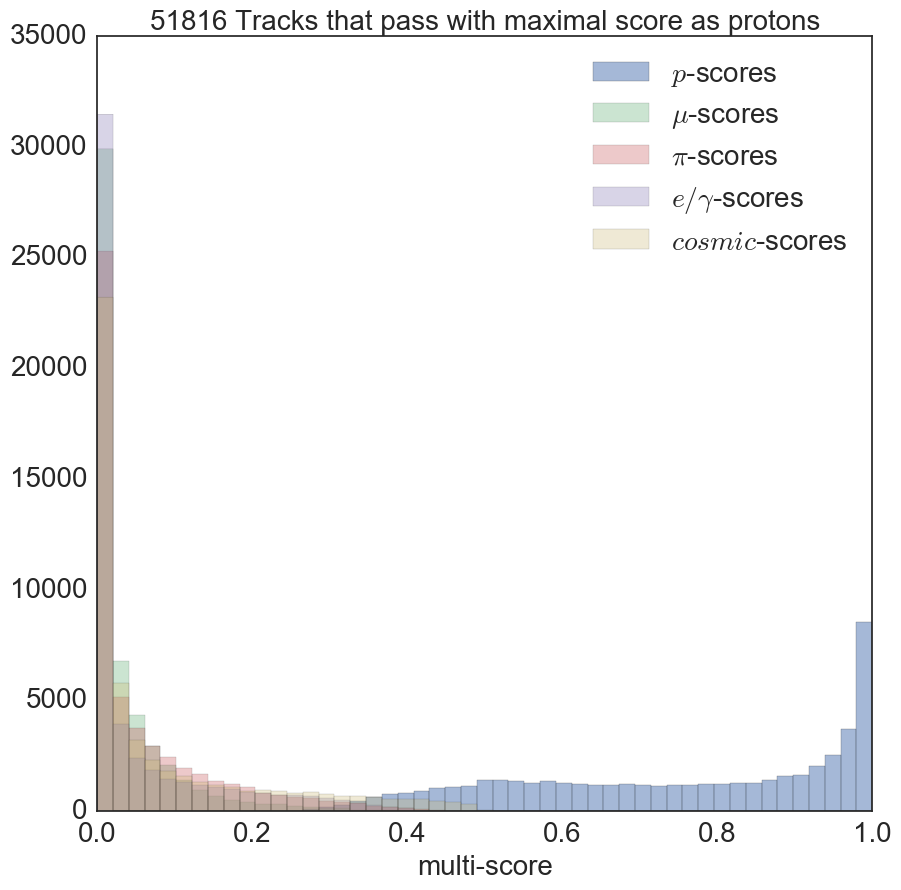

In [5]:
fig = plt.figure(figsize=[10,10])
ax = plt.subplot(111)
bins = np.linspace(0,1,50)
plt.hist(classified_proton_tracks.mscore_p ,bins=bins, label='$p$-scores' , alpha=0.5)
plt.hist(classified_proton_tracks.mscore_mu,bins=bins, label='$\\mu$-scores', alpha=0.3)
plt.hist(classified_proton_tracks.mscore_pi,bins=bins, label='$\\pi$-scores', alpha=0.3)
plt.hist(classified_proton_tracks.mscore_em,bins=bins, label='$e/\gamma$-scores', alpha=0.3)
plt.hist(classified_proton_tracks.mscore_cos,bins=bins, label='$cosmic$-scores', alpha=0.3)

plt.title('%d Tracks that pass with maximal score as protons'%len(classified_proton_tracks),fontsize=20)
plt.xlabel('multi-score',fontsize=20)
plt.legend(fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

fig.savefig("/Users/erezcohen/Desktop/scores_distributions_for_classified_protons.pdf")

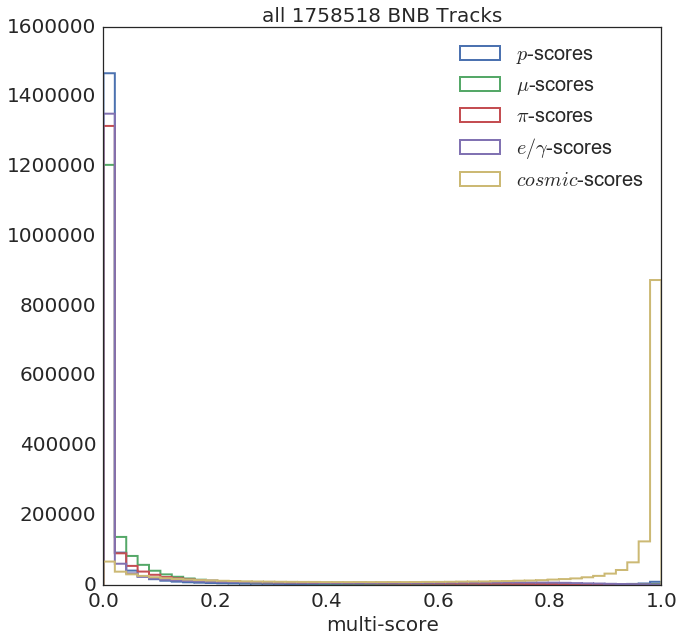

In [18]:
fig = plt.figure(figsize=[10,10])
ax = plt.subplot(111)
bins = np.linspace(0,1,50)
plt.hist(tracks.mscore_p ,bins=bins, histtype='step', linewidth=2 , label='$p$-scores')
plt.hist(tracks.mscore_mu,bins=bins, histtype='step', linewidth=2 ,label='$\\mu$-scores')
plt.hist(tracks.mscore_pi,bins=bins, histtype='step', linewidth=2 ,label='$\\pi$-scores')
plt.hist(tracks.mscore_em,bins=bins, histtype='step', linewidth=2 ,label='$e/\gamma$-scores')
plt.hist(tracks.mscore_cos,bins=bins, histtype='step', linewidth=2 ,label='$cosmic$-scores')

plt.title('all %d BNB Tracks'%len(tracks),fontsize=20)
pt.set_axes(ax , 'multi-score' , '')
plt.legend(fontsize=20)
fig.savefig("/Users/erezcohen/Desktop/scores_distributions_for_all_tracks.pdf")

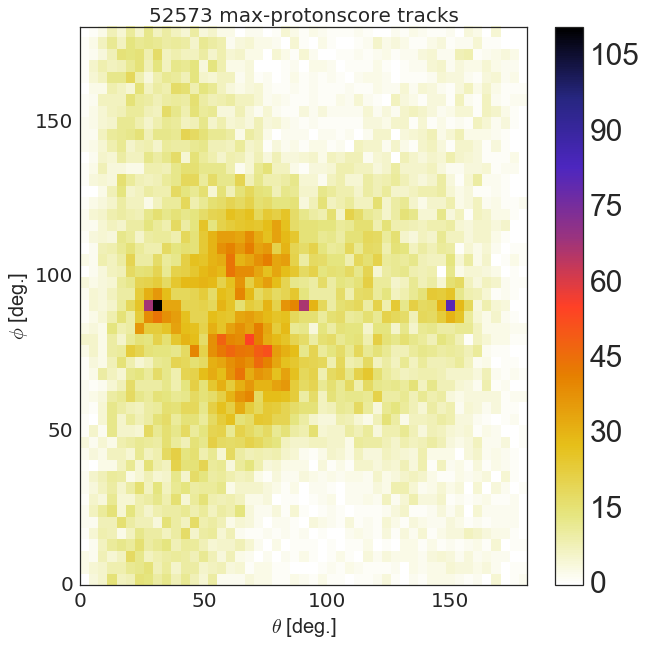

In [35]:
fig = plt.figure(figsize=[10,10])
ax = plt.subplot(111)
bins = [np.linspace(0,181,50),np.linspace(0,181,50)]
plt.hist2d( (180/math.pi)*classified_proton_tracks.theta ,
           (180/math.pi)*classified_proton_tracks.phi,
           bins=bins,
          cmap='CMRmap_r')
plt.colorbar()
plt.title('%d max-protonscore tracks'%len(classified_proton_tracks),fontsize=20)
pt.set_axes(ax , '$\\theta$ [deg.]' , '$\\phi$ [deg.]')

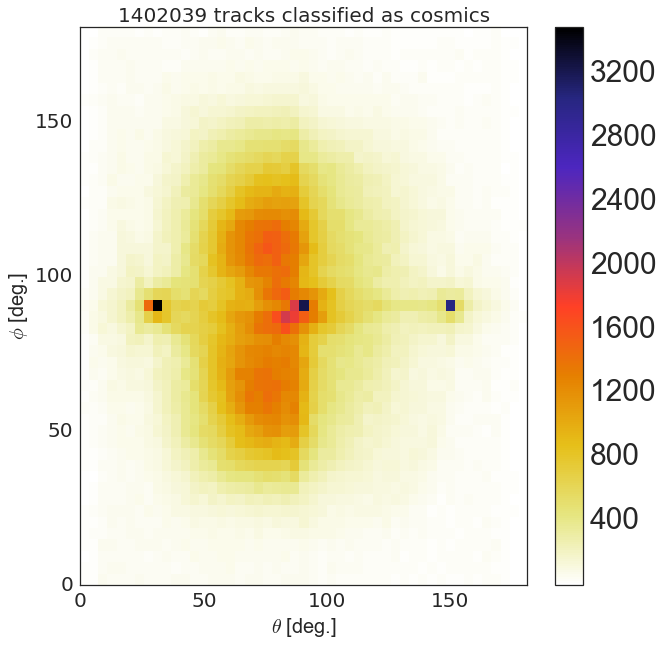

In [37]:
fig = plt.figure(figsize=[10,10])
ax = plt.subplot(111)
bins = [np.linspace(0,181,50),np.linspace(0,181,50)]
plt.hist2d( (180/math.pi)*cosmic_tracks.theta ,
           (180/math.pi)*cosmic_tracks.phi,
           bins=bins,
          cmap='CMRmap_r')
plt.colorbar()
plt.title('%d tracks classified as cosmics'%len(cosmic_tracks),fontsize=20)
pt.set_axes(ax , '$\\theta$ [deg.]' , '$\\phi$ [deg.]')